<a href="https://colab.research.google.com/github/vivianesilviana/vivianesilviana/blob/main/Proyek_Decision_Tree_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Libraries

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Loading Data
Menampilkan kumpulan data yang diperlukan menggunakan pandas untuk membaca file CSV. 

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/vivianesilviana/vivianesilviana/main/NEW%20Analysis%20Gabungan%20bersih.csv",sep=";")
df.head()

,ID Pasien,Status Kelangsungan Pasien,Survival Time,Sex,Usia,Diagnosa Komplikasi,Diagnosa Penyerta,Profil Terapi,Kadar Gula Darah,Cluster
0,1,0,10,2,2,1,1,2,3,0
1,2,0,9,1,2,1,1,2,3,0
2,3,0,1,1,2,1,1,1,3,2
3,4,0,4,1,2,0,1,3,3,0
4,5,0,3,2,2,0,1,3,3,0


# Feature Selection
Membagi kolom yang diberikan menjadi dua jenis variabel dependen (atau variabel target) dan variabel independen (atau variabel fitur).Tujuannya untuk memisahkan atribut menjadi x dan y

In [6]:
#split dataset in features and target variable
feature_cols = ['ID Pasien', 'Status Kelangsungan Pasien', 'Survival Time', 'Sex', 'Usia', 'Diagnosa Komplikasi', 'Diagnosa Penyerta', 'Profil Terapi', 'Kadar Gula Darah']
X = df[feature_cols] # Features
y = df.Cluster # Target variable

# Splitting Data
Membagi dataset menjadi satu set data training dan satu set data pengujian.
Memisahkan dataset dengan menggunakan function train_test_split ().

In [8]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Building Decision Tree Model
Memanggil data yang sudah dibuat diatas

In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Evaluating Model
Evalusi dilakukan untuk mengetahui tingkat akurasi model yang digunakan untuk mengklasifikasikan data

In [10]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9896907216494846


# Visualizing Decision Trees

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


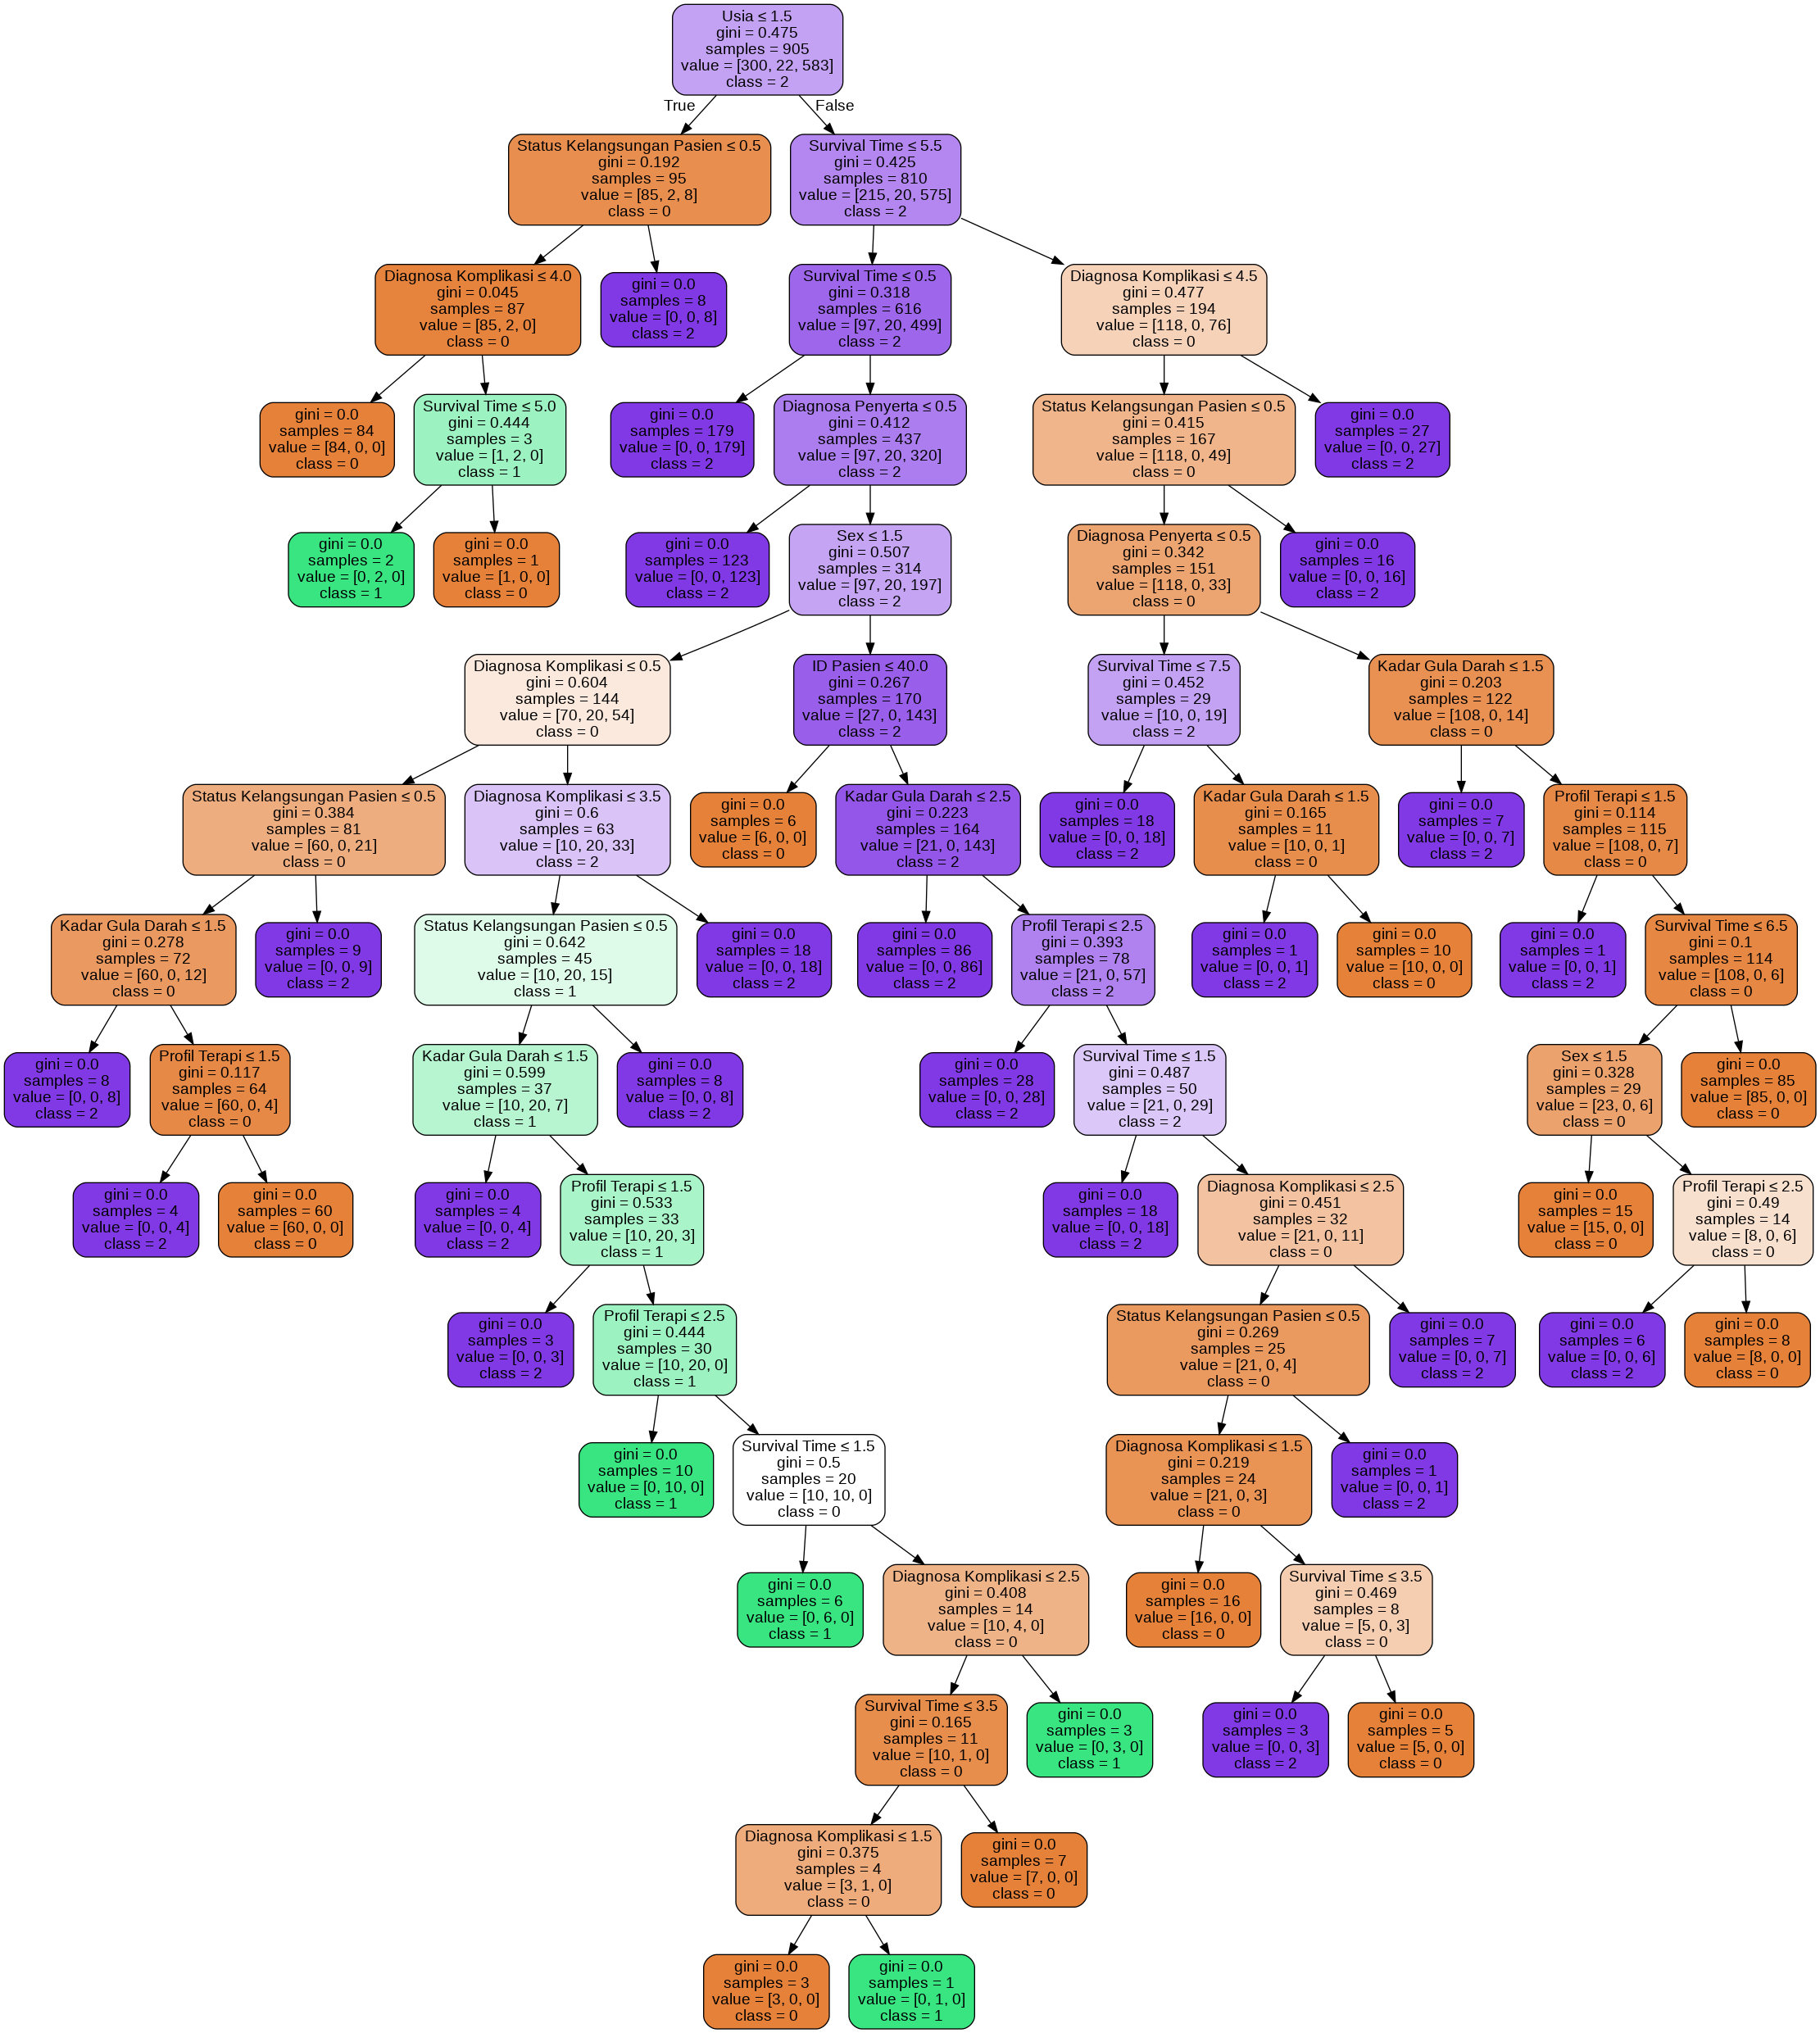

In [11]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('angub.png')
Image(graph.create_png())

Dalam diagram pohon keputusan, setiap node internal memiliki aturan keputusan yang memisahkan data. Gini disebut sebagai rasio Gini, yang mengukur ketidakmurnian node ( simpul ) dalam menentukan pilihan yang ada node dimulai dari satu node. Anda dapat mengatakan node itu murni ketika semua recordnya termasuk dalam kelas yang sama, node seperti itu dikenal sebagai node daun.

Di sini, pohon yang dihasilkan tidak ditebang. Pohon yang tidak ditebang ini tidak bisa dijelaskan dan tidak mudah dimengerti. Di bagian selanjutnya, mari kita optimalkan dengan pemangkasan.

# Optimizing Decision Tree Performance
Di Scikit-learn, pengoptimalan pengklasifikasi pohon keputusan dilakukan hanya dengan pemangkasan sebelumnya. Nilai maksimum pohon dapat digunakan sebagai variabel kontrol untuk pemangkasan sebelumnya. Dalam contoh berikut, Anda dapat memplot pohon keputusan pada data yang sama dengan max_depth = 3. Selain parameter pra-pemangkasan, Anda juga dapat mencoba ukuran pemilihan atribut lain seperti entropi.

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7963917525773195


#Visualizing Decision Trees

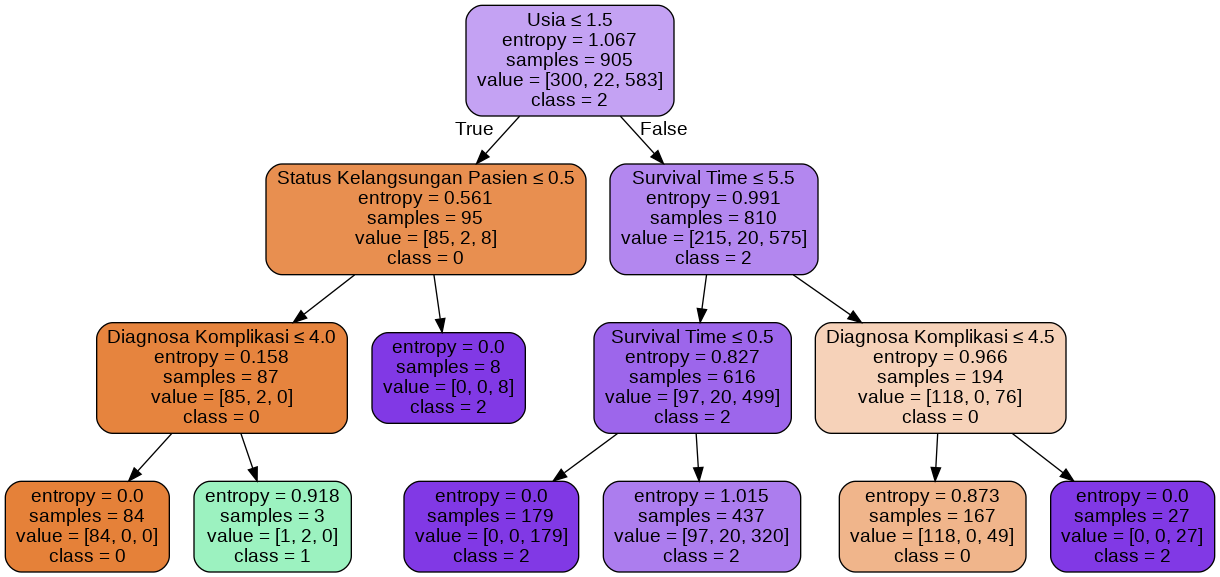

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('angub.png')
Image(graph.create_png())

#*Keterangan :*

Entropy merupakan nialai awal yang digunakan untuk menentukan akar saat memilih atribut yang adakan dijadikan akar pohon

Sample adalah jumlah data trinning yang akan dimodelkan

Value adalah jumlah nilai masing masing dari data training biasanya nilai value berdasarkan banyaknya kelas

Class merupakan kelas yang dominan dari nilai kriterianya

# Kesimpulan :
Dalam pembuatan model Decision Tree, kriteria yang digunakan untuk menentukan informasi dapat menggunakan Gini Index dan Entropy. Namun untuk pembuatan model Decision Tree, ketika menggunakan Gini Index membutuhkan proses yang lebih lama karena dalam Gini Indeks intervalnya hanya berjarak [0, 0.05] sedangkan ketika menggunakan entropi pembuatan modelnya lebih cepat karena jarak intervalnya adalah [0, 1]